In [42]:
import math
import random

# choose sigmoid activation function
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

# Derivative of the sigmoid function for backpropagation
def sigmoid_derivative(x):
  return x * (1 - x)

# Initialize network parameters
def initialize_network(n_inputs, n_hidden, n_outputs):
  network = list()
  hidden_layer = [{'weights':[random.uniform(-0.5, 0.5) for i in range(n_inputs + 1)]} for i in range(n_hidden)]
  network.append(hidden_layer)
  output_layer = [{'weights':[random.uniform(-0.5, 0.5) for i in range(n_hidden + 1)]} for i in range(n_outputs)]
  network.append(output_layer)
  return network

# Forward propagate input to a network output
def forward_propagate(network, row):
  inputs = row
  for layer in network:
    new_inputs = []
    for neuron in layer:
      activation = neuron['weights'][-1]  # bias
      for i in range(len(inputs)):
        activation += neuron['weights'][i] * inputs[i]
      neuron['output'] = sigmoid(activation)
      new_inputs.append(neuron['output'])
    inputs = new_inputs
  return inputs

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
  for i in reversed(range(len(network))):
    layer = network[i]
    errors = list()
    if i != len(network)-1:
      for j in range(len(layer)):
        error = 0.0
        for neuron in network[i + 1]:
          error += (neuron['weights'][j] * neuron['delta'])
        errors.append(error)
    else:
      for j, neuron in enumerate(layer):
        errors.append(expected[j] - neuron['output'])
    for j, neuron in enumerate(layer):
      neuron['delta'] = errors[j] * sigmoid_derivative(neuron['output'])
# Update network weights with error
def update_weights(network, row, l_rate):
  for i, layer in enumerate(network):
    inputs = row[:-1] if i == 0 else [neuron['output'] for neuron in network[i - 1]]
    for neuron in layer:
      for j in range(len(inputs)):
        neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
      neuron['weights'][-1] += l_rate * neuron['delta']  # update the bias weight


In [33]:
train1path = '/content/drive/MyDrive/Colab Notebooks/data_files/Train1.txt'
train2path = '/content/drive/MyDrive/Colab Notebooks/data_files/Train2.txt'
test1path = '/content/drive/MyDrive/Colab Notebooks/data_files/Test1.txt'
test2path = '/content/drive/MyDrive/Colab Notebooks/data_files/Test2.txt'

In [58]:
'''
Task 1.2 load data and train
'''
def load_data(filepath,label):
  dataset = []
  with open(filepath, 'r') as file:
    for line in file:
      if line.strip():  # skip empty lines
        data_row = [float(value) for value in line.split()]
        data_row.append(label)  # Append the label
        dataset.append(data_row)
  return dataset

# Load all data
train1 = load_data(train1path,0)
train2 = load_data(train2path,1)
test1 = load_data(test1path,0)
test2 = load_data(test2path,1)

# Assume the last column is the label and normalize the features
def normalize_dataset(dataset):
  minmax = list()
  for i in range(len(dataset[0]) - 1):  # loop over each column/feature
    col_values = [row[i] for row in dataset]
    value_min = min(col_values)
    value_max = max(col_values)
    minmax.append((value_min, value_max))
  for row in dataset:
    for i in range(len(row) - 1):
      row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
  return dataset

# Normalize all datasets
train1norm = normalize_dataset(train1)
train2norm = normalize_dataset(train2)
test1norm = normalize_dataset(test1)
test2norm = normalize_dataset(test2)

# Combine training data and labels
train_data = train1norm + train2norm
random.shuffle(train_data)
test_data = test1norm + test2norm
train_ratio = 1500/2000
split_index = int(len(train_data)*train_ratio)

train_set = train_data[:split_index]
validation_set = train_data[split_index:]



class label 1
>epoch=0, lrate=0.01, train_error=0.5014578789054738, validation_error=0.4828177904244757
>epoch=1, lrate=0.01, train_error=0.47184596437622356, validation_error=0.4599086512882288
>epoch=2, lrate=0.01, train_error=0.4501756673259415, validation_error=0.44022156293662984
>epoch=3, lrate=0.01, train_error=0.43204197601946837, validation_error=0.42437849647432074
>epoch=4, lrate=0.01, train_error=0.41775553169172674, validation_error=0.4122925218090128
>epoch=5, lrate=0.01, train_error=0.4071093955634318, validation_error=0.4036032204294028
>epoch=6, lrate=0.01, train_error=0.39973562724859063, validation_error=0.39791667774006484
>epoch=7, lrate=0.01, train_error=0.39526675113299603, validation_error=0.3948864200794325
>epoch=8, lrate=0.01, train_error=0.39337339274063665, validation_error=0.3942077004993967
>epoch=9, lrate=0.01, train_error=0.3937481587077831, validation_error=0.3955876957784589
>epoch=10, lrate=0.01, train_error=0.39608078838271044, validation_error=0.39

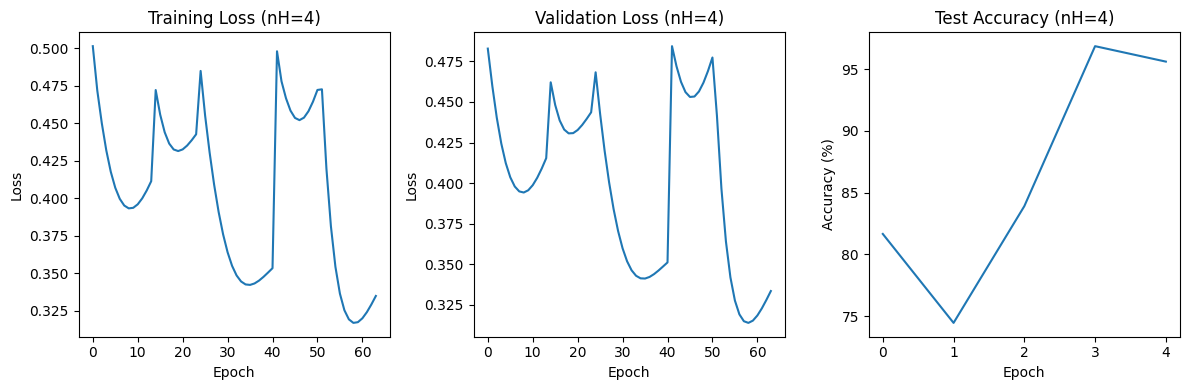

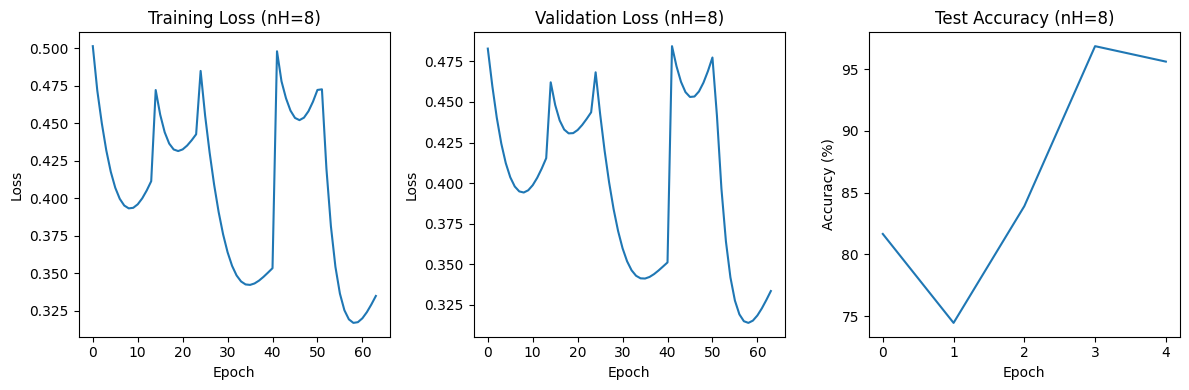

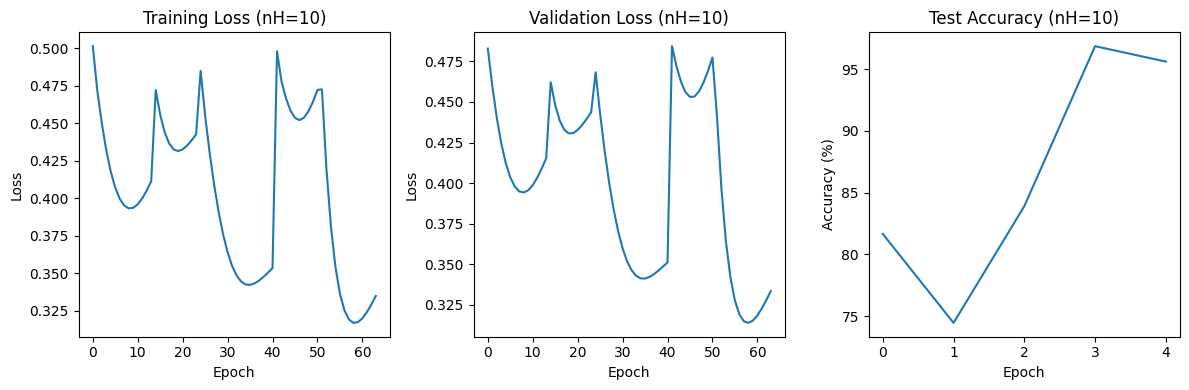

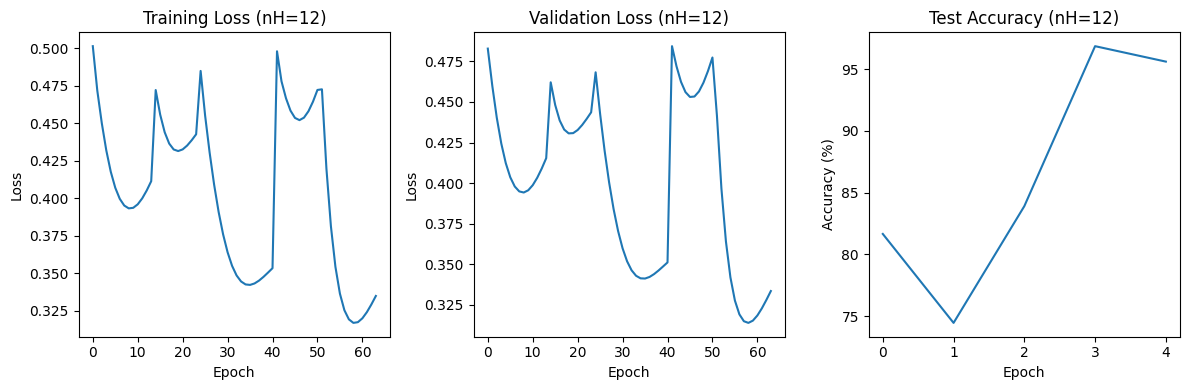

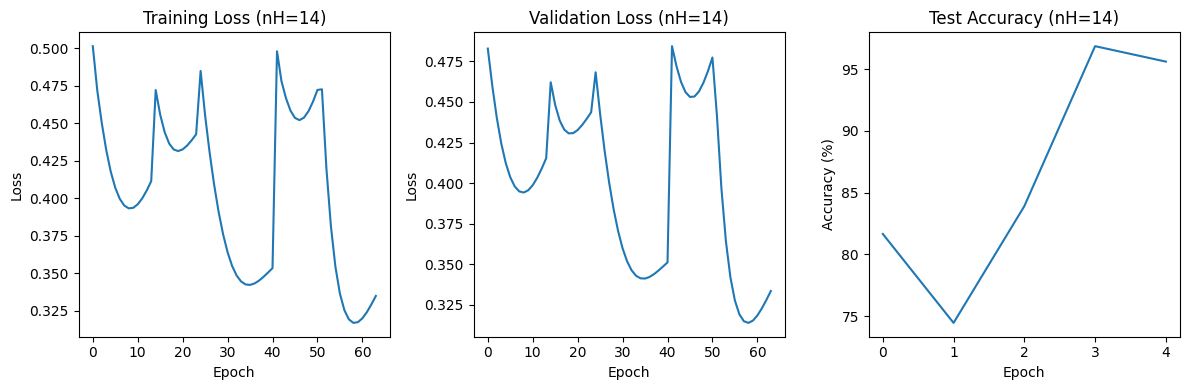

In [65]:
train_losses = []
validation_losses = []
test_accuracies = []
import matplotlib.pyplot as plt
def predict(network, row):
    outputs = forward_propagate(network, row)
    #print("outputs: ",outputs)
    return outputs.index(max(outputs))
# Train the network for a fixed number of epochs
def train_network(network, train, validation,l_rate, n_epoch, n_outputs,patience=5):

  best_validation_loss = float('inf')
  patience_counter = 0

  for epoch in range(n_epoch):
    sum_error = 0
    for row in train:
      outputs = forward_propagate(network, row)
      expected = [0 for i in range(n_outputs)]
      expected[int(row[-1])] = 1  # last column in row is the class label

      # MSE
      sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
      backward_propagate_error(network, expected)
      update_weights(network, row, l_rate)

    average_train_error = sum_error/len(train)
    train_losses.append(average_train_error)
    validation_loss = 0.0

    for row in validation:
      outputs = forward_propagate(network, row)
      expected = [0 for i in range(n_outputs)]
      expected[int(row[-1])] = 1
      validation_loss += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
    average_validation_loss = validation_loss / len(validation)
    validation_losses.append(average_validation_loss)
    # Early stopping check
    if average_validation_loss < best_validation_loss:
      best_validation_loss = average_validation_loss
      patience_counter = 0
    else:
      patience_counter += 1
      if patience_counter >= patience:
        print(f"Early stopping: Stopped at epoch {epoch}.")
        break

    print(f'>epoch={epoch}, lrate={l_rate}, train_error={average_train_error}, validation_error={average_validation_loss}')

  return network
# Evaluate the network
def evaluate_network(network, test):
  correct = 0
  for row in test:
    prediction = predict(network, row)
    #print("prediction: \n",prediction)
    #print("row[-1]\n",row[-1])
    if int(prediction) == int(row[-1]):

      correct += 1
  test_accuracies.append(correct / float(len(test)) * 100.0)
  return correct / float(len(test)) * 100.0



best_accuracy = 0
best_nh = 0
train_losses_list = []
validation_losses_list = []
test_accuracies_list = []
# Initialize a network
nh = [4,8,10,12,14]
n_inputs = len(train_set[0]) - 1
n_outputs = len(set([row[-1] for row in train_set]))  # class label is the last column
sample_row = train_set[0]
class_label = sample_row[-1]
print("class label",class_label)

for i in nh:
  network = initialize_network(n_inputs, 2*i-1 , n_outputs)

  # Train the network
  train_network(network, train_set,validation_set ,0.01, 50, n_outputs,patience=5)

  # Test the network
  accuracy = evaluate_network(network, test_data)
  print(f'Accuracy for {2*i-1} hidden nodes: {accuracy:.3f}%')
  train_losses_list.append(train_losses)
  validation_losses_list.append(validation_losses)
  test_accuracies_list.append(test_accuracies)
  # Update best accuracy and best_nh if current model is better
  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_nh = 2*i-1

'''
Task 1.3 plot
'''
print(f'Best number of hidden nodes: {best_nh}')
print(f'Best accuracy achieved: {best_accuracy:.3f}%')
for i, nH in enumerate(nh):
  plt.figure(figsize=(12, 4))

  plt.subplot(1, 3, 1)
  plt.plot(train_losses_list[i])
  plt.title(f'Training Loss (nH={nH})')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

  plt.subplot(1, 3, 2)
  plt.plot(validation_losses_list[i])
  plt.title(f'Validation Loss (nH={nH})')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

  plt.subplot(1, 3, 3)
  plt.plot(test_accuracies_list[i])
  plt.title(f'Test Accuracy (nH={nH})')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy (%)')

  plt.tight_layout()
  plt.show()


In [68]:
!pip install tensorflow

In [73]:
'''
Task 2
'''

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Build the CNN model
model = Sequential([
    Conv2D(16, (3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=1),
    Conv2D(32, (3, 3), strides=(1, 1), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=1),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=8, batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/8
938/938 [==============================] - 125s 132ms/step - loss: 0.1303 - accuracy: 0.9598
Epoch 2/8
938/938 [==============================] - 123s 131ms/step - loss: 0.0414 - accuracy: 0.9872
Epoch 3/8
938/938 [==============================] - 120s 128ms/step - loss: 0.0284 - accuracy: 0.9906
Epoch 4/8
938/938 [==============================] - 119s 127ms/step - loss: 0.0211 - accuracy: 0.9930
Epoch 5/8
938/938 [==============================] - 120s 128ms/step - loss: 0.0165 - accuracy: 0.9942
Epoch 6/8
938/938 [==============================] - 122s 130ms/step - loss: 0.0136 - accuracy: 0.9954
Epoch 7/8
938/938 [==============================] - 120s 127ms/step - loss: 0.0114 - accuracy: 0.9965
Epoch 8/8
313/313 [==============================] - 5s 14ms/step - loss: 0.0516 - accuracy: 0.9871
Test accuracy: 0.9871000051498413
